## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [2]:
data=pd.read_csv('/content/Untitled Folder/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Overview of data

In [3]:
len(data)

53940

In [4]:
data.shape[0]

53940

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Cleaning and Preprocessing

In [7]:
data = data.drop(["Unnamed: 0"],axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [9]:
data['volume'] = data['x']*data['y']*data['z']
data.drop(['x', 'y', 'z'], axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


## Correlation Matrix

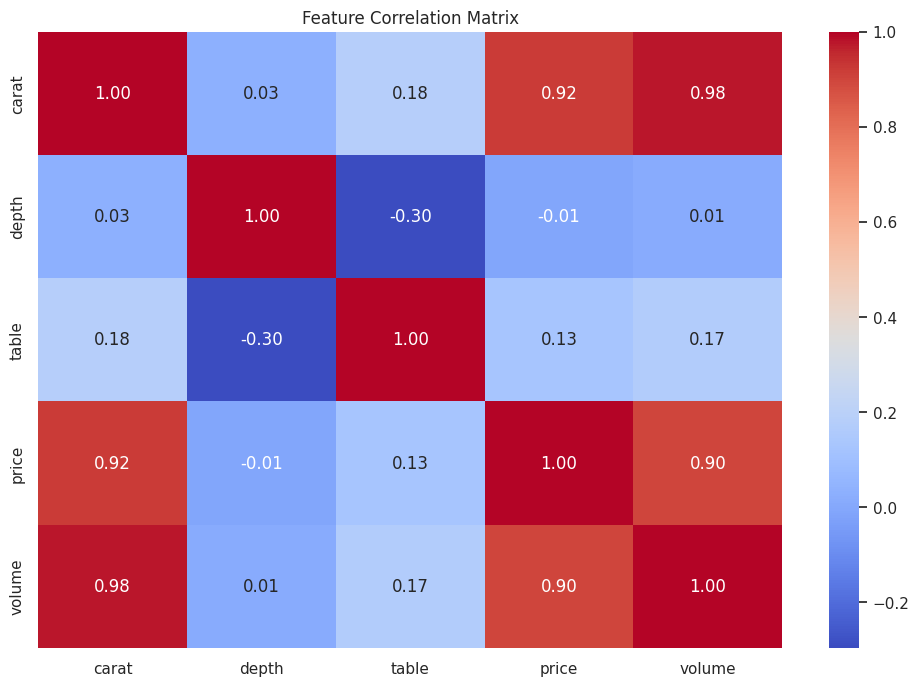

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['cut', 'color', 'clarity']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

Outlier Analysis

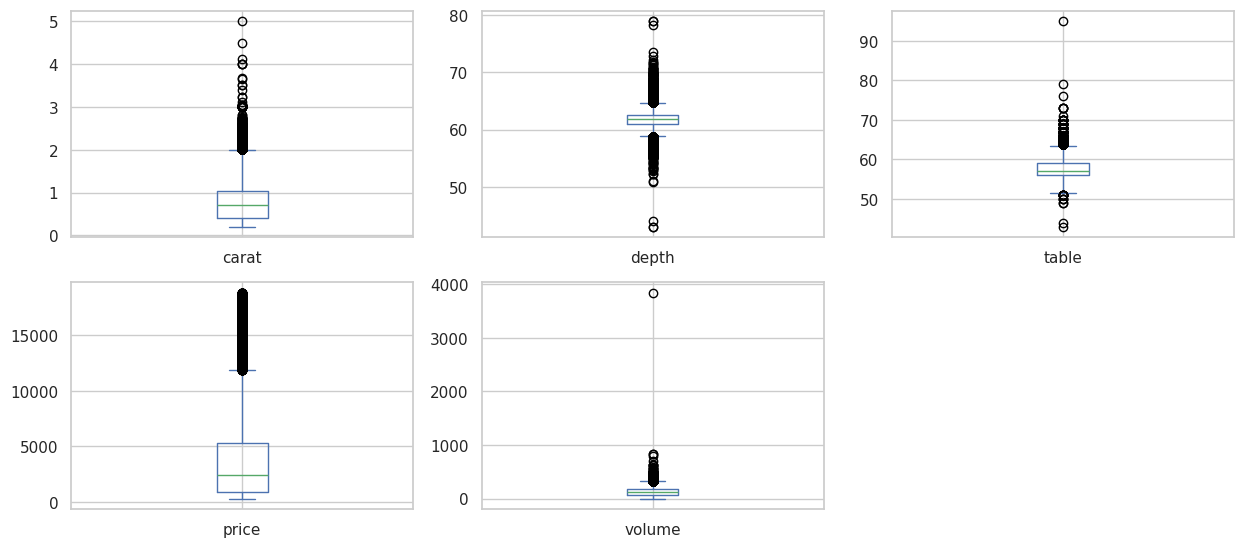

In [11]:
data.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [12]:
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print("Outliers:", outliers)

    cleaned_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return cleaned_data


numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    data = remove_outliers(data, col)

data.shape

Outliers:        carat      cut color clarity  depth  table  price      volume
12246   2.06  Premium     J      I1   61.2   58.0   5203  323.566650
13002   2.14     Fair     J      I1   69.4   57.0   5405  319.445280
13118   2.15     Fair     J      I1   65.5   57.0   5430  333.043785
13757   2.22     Fair     J      I1   66.7   56.0   5607  345.617088
13991   2.01     Fair     I      I1   67.4   58.0   5696  304.535748
...      ...      ...   ...     ...    ...    ...    ...         ...
27741   2.15    Ideal     G     SI2   62.6   54.0  18791  360.644015
27742   2.04  Premium     H     SI1   58.1   60.0  18795  335.429424
27744   2.29  Premium     I     SI1   61.8   59.0  18797  377.248560
27746   2.07    Ideal     G     SI2   62.5   55.0  18804  340.663260
27749   2.29  Premium     I     VS2   60.8   60.0  18823  371.494200

[1889 rows x 8 columns]
Outliers:        carat        cut color clarity  depth  table  price      volume
2       0.23       Good     E     VS1   56.9   65.0    3

(46526, 8)

Analysing Numerical and Categorical data

In [13]:
numerical_cols = data.select_dtypes(include=np.number).columns.to_list()
categorical_cols = data.select_dtypes(exclude=np.number).columns.to_list()

In [14]:
numerical_cols

['carat', 'depth', 'table', 'price', 'volume']

In [15]:
categorical_cols

['cut', 'color', 'clarity']

In [16]:
data['cut'].value_counts()

,count
cut,
Ideal,20096
Premium,11744
Very Good,10742
Good,3677
Fair,267


In [17]:
data['color'].value_counts()

,count
color,
G,9870
E,8740
F,8292
H,6981
D,6069
I,4376
J,2198


In [18]:
data['clarity'].value_counts()

,count
clarity,
SI1,11271
VS2,10719
VS1,7252
SI2,7239
VVS2,4573
VVS1,3393
IF,1618
I1,461


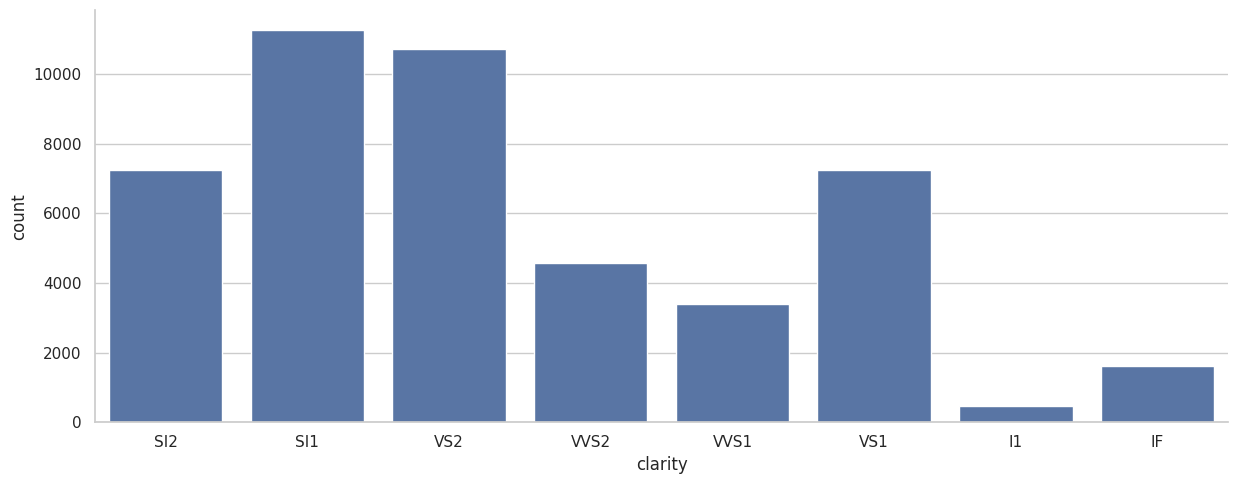

In [19]:
sns.catplot(x='clarity', data=data, kind='count',aspect=2.5)

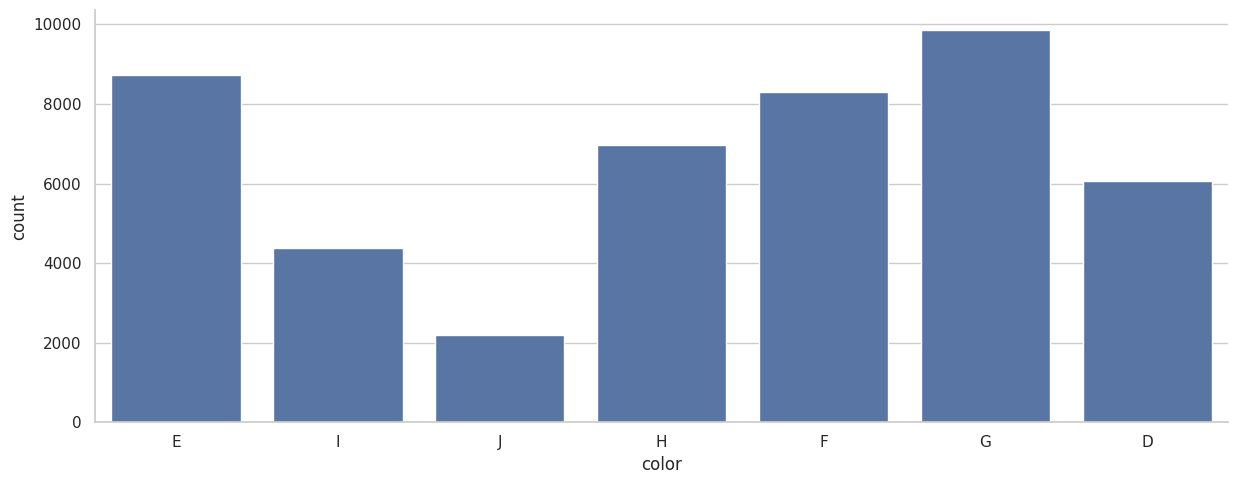

In [20]:
sns.catplot(x='color', data=data, kind='count',aspect=2.5)

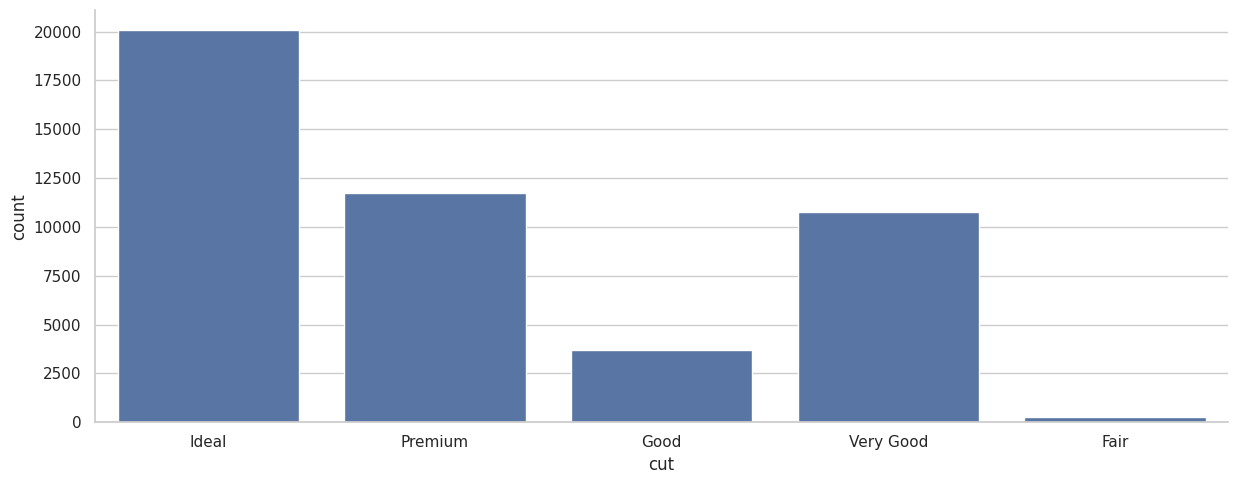

In [21]:
sns.catplot(x='cut', data=data, kind='count',aspect=2.5)

Data Visualization

<Axes: xlabel='volume', ylabel='carat'>

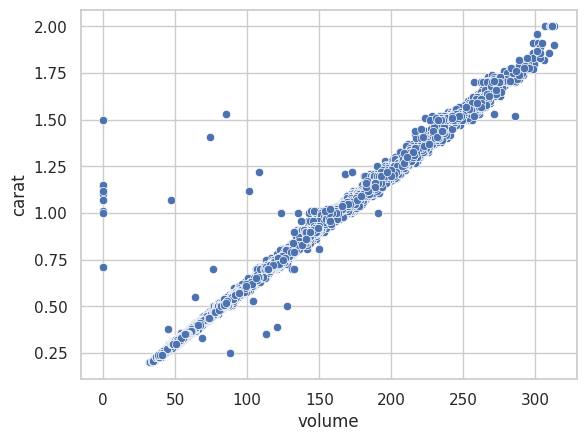

In [22]:
sns.scatterplot(data=data, x=data['volume'], y=data['carat'])

<Axes: xlabel='volume', ylabel='price'>

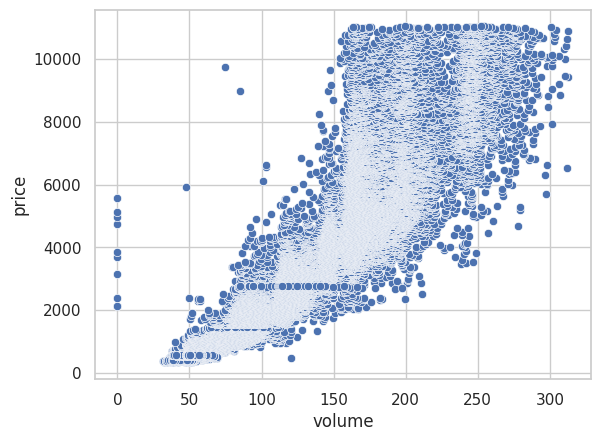

In [23]:
sns.scatterplot(data=data, x=data['volume'], y=data['price'])

<Axes: xlabel='volume', ylabel='table'>

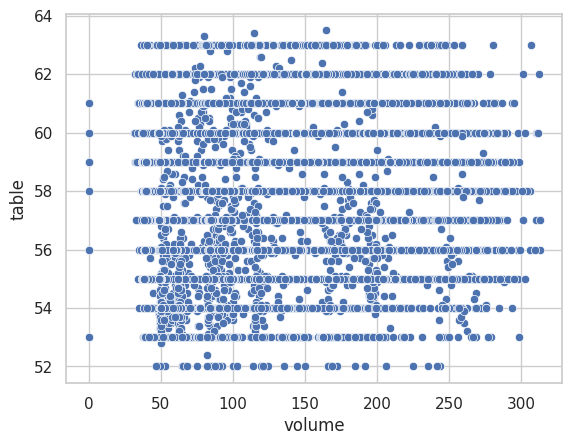

In [24]:
sns.scatterplot(data=data, x=data['volume'], y=data['table'])

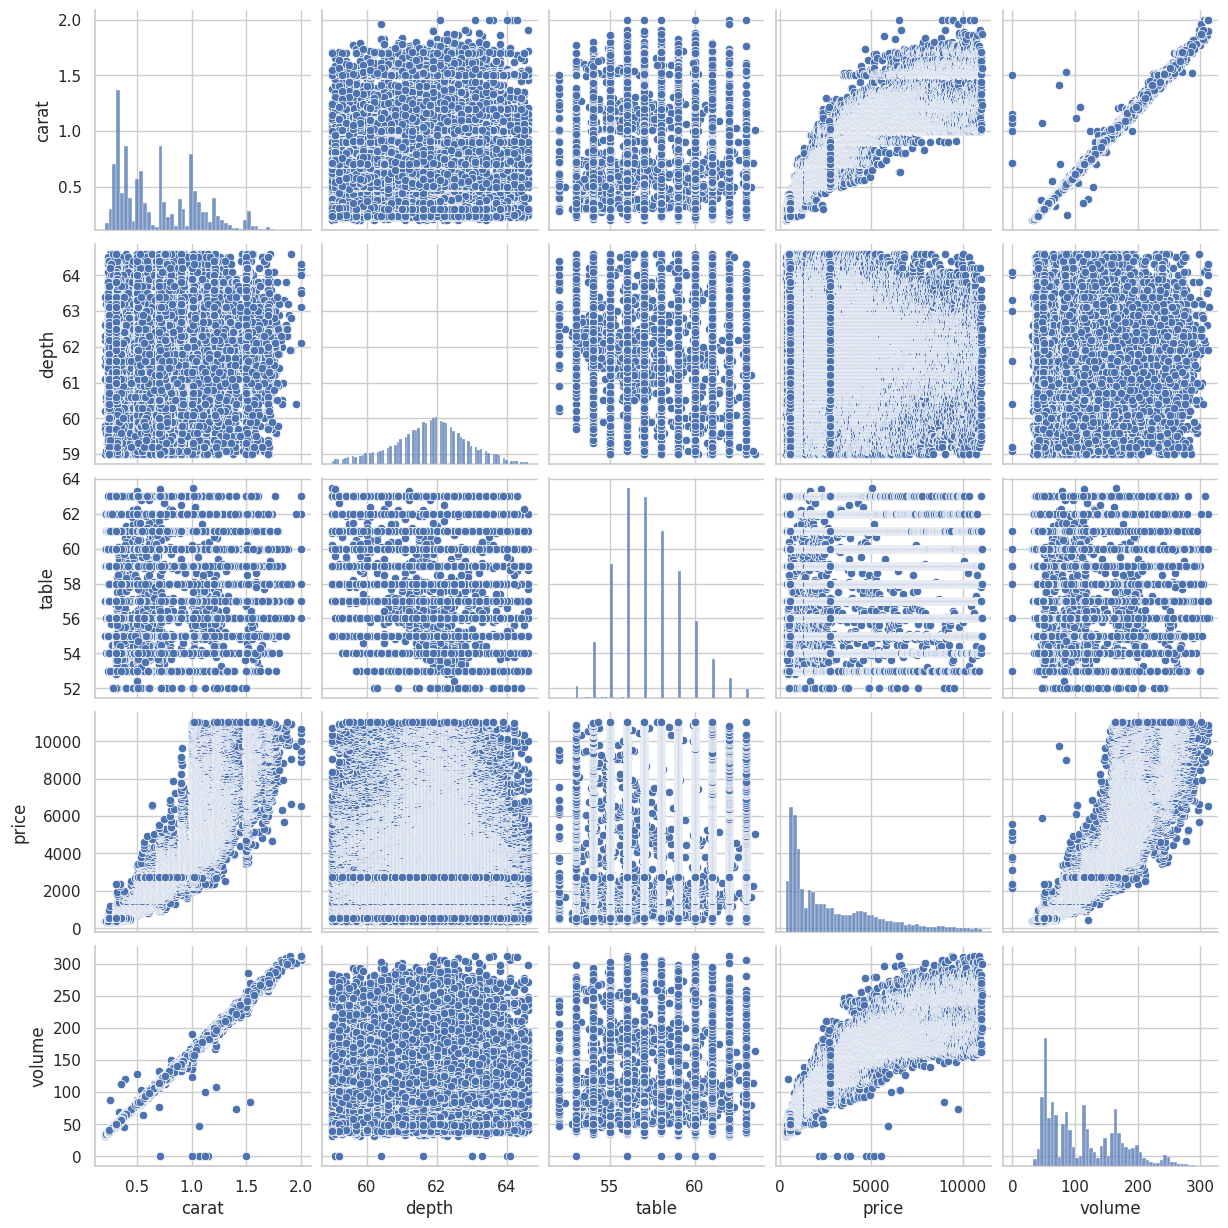

In [25]:
sns.pairplot(data)

## Split data  X and y

In [26]:
X = data.drop(columns=['price'])
y = data['price']

## Encoding the Independent Variable

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['cut', 'color', 'clarity']
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

## Spliting Train-Test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the Random Forest Regressor on the whole dataset

In [29]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators = 73, random_state = 44)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=73, random_state=44)

## Evaluating Model

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 133628.53922901925
R2: 0.9803832069050153


## Visualising the Random Forest Regression results (higher resolution)

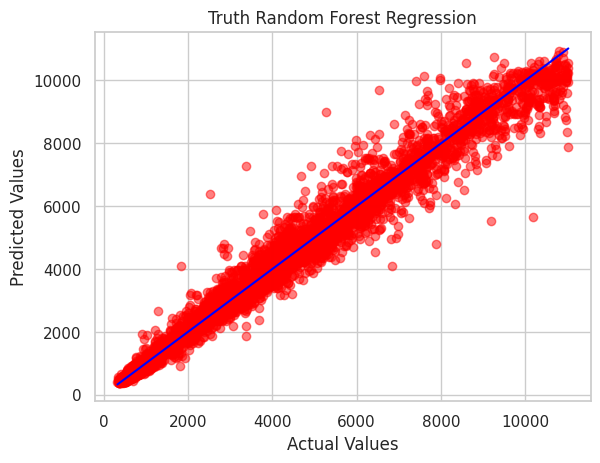

In [31]:
plt.scatter(y_test, y_pred, alpha=0.5 ,color = 'red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Truth Random Forest Regression')
plt.grid(True)